In [1]:
import pandas as pd

# Data Exploration & Cleaning (Week 1)

In [2]:
data = pd.read_csv("/Users/rajatthakur/Desktop/SuperDataScienceML/CollaborationProjects/SDS-CP010-tech-companies-analysis/data/tech-companies.csv")

In [3]:
data

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,$2.866 T,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,$2.755 T,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,$1.186 T,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,$495.95 B,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,$487.64 B,2330,Taiwan,Technology,Semiconductors
...,...,...,...,...,...,...,...
995,996,"Henan Thinker Automatic Equipment Co.,Ltd.",$825.4 M,603508,China,Technology,Scientific & Technical Instruments
996,997,"transcosmos, Inc.",$819.5 M,9715,Japan,Technology,Information Technology Services
997,998,Yeahka Ltd,$819.3 M,9923,China,Technology,Software—Infrastructure
998,999,Beijing Wanji Technology Co. Ltd,$816.1 M,300552,China,Technology,Scientific & Technical Instruments


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ranking     1000 non-null   int64 
 1   Company     1000 non-null   object
 2   Market Cap  1000 non-null   object
 3   Stock       1000 non-null   object
 4   Country     1000 non-null   object
 5   Sector      1000 non-null   object
 6   Industry    1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [5]:
# Summary Statistics:

In [6]:
#Transformation of Market Cap to Numeric data to understand Marktet Cap Statistics
for i, marketCap in enumerate(data['Market Cap']):
    marketCap = marketCap.replace('$', '')
    
    if 'T' in marketCap:
        marketCap = float(marketCap.replace('T', '')) * 1e12
    elif 'B' in marketCap:
        marketCap = float(marketCap.replace('B', '')) * 1e9
    elif 'M' in marketCap:
        marketCap = float(marketCap.replace('M', '')) * 1e6
    else:
        marketCap = float(marketCap) 
    
    data['Market Cap'][i] = marketCap


/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_41929/547994546.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Market Cap'][i] = marketCap


In [7]:
data

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,2866000000000.0,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,2755000000000.0,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,1186000000000.0,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,495950000000.0,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,487640000000.0,2330,Taiwan,Technology,Semiconductors
...,...,...,...,...,...,...,...
995,996,"Henan Thinker Automatic Equipment Co.,Ltd.",825400000.0,603508,China,Technology,Scientific & Technical Instruments
996,997,"transcosmos, Inc.",819500000.0,9715,Japan,Technology,Information Technology Services
997,998,Yeahka Ltd,819300000.0,9923,China,Technology,Software—Infrastructure
998,999,Beijing Wanji Technology Co. Ltd,816100000.0,300552,China,Technology,Scientific & Technical Instruments


In [8]:
pip install numerize 

Note: you may need to restart the kernel to use updated packages.


In [9]:
from numerize import numerize 

In [10]:
averageMarketCap = numerize.numerize(data['Market Cap'].mean())
print('Average Market Cap of Top 1000 Companies: ',averageMarketCap)

Average Market Cap of Top 1000 Companies:  18.76B


In [11]:
marketCapVariation = numerize.numerize(data['Market Cap'].std())
print('Standard Deviation(Market Cap Variation): ', marketCapVariation)

Standard Deviation(Market Cap Variation):  135.73B


In [12]:
medianMarketCap = numerize.numerize(data['Market Cap'].median())
print('Meidan Market Cap: ', medianMarketCap)

Meidan Market Cap:  2.74B


In [13]:
topTenCompanies = data[['Company', 'Market Cap']].head(10)
display('Top Ten Companies according to their Market Cap', topTenCompanies['Company'], topTenCompanies['Market Cap'].apply(numerize.numerize))

'Top Ten Companies according to their Market Cap'

0                                           Apple Inc.
1                                Microsoft Corporation
2                                   Nvidia Corporation
3                                        Broadcom Inc.
4    Taiwan Semiconductor Manufacturing Company Lim...
5                        Samsung Electronics Co., Ltd.
6                                    ASML Holding N.V.
7                                   Oracle Corporation
8                                           Adobe Inc.
9                                 salesforce.com, inc.
Name: Company, dtype: object

0      2.87T
1      2.76T
2      1.19T
3    495.95B
4    487.64B
5    392.38B
6     297.1B
7    282.01B
8    260.23B
9    243.78B
Name: Market Cap, dtype: object

In [14]:
totalCountries = data['Country'].unique().size
print(totalCountries ,'countries are represented by the companies there.')

38 countries are represented by the companies there.


In [15]:
totalIndustries = data['Industry'].unique().size
print('Total number of Industries: ', totalIndustries)

Total number of Industries:  12


In [16]:
industriesSector = data['Sector'].unique()
print('All the industries belongs to', industriesSector, 'sector')

All the industries belongs to ['Technology'] sector


In [17]:
data

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,2866000000000.0,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,2755000000000.0,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,1186000000000.0,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,495950000000.0,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,487640000000.0,2330,Taiwan,Technology,Semiconductors
...,...,...,...,...,...,...,...
995,996,"Henan Thinker Automatic Equipment Co.,Ltd.",825400000.0,603508,China,Technology,Scientific & Technical Instruments
996,997,"transcosmos, Inc.",819500000.0,9715,Japan,Technology,Information Technology Services
997,998,Yeahka Ltd,819300000.0,9923,China,Technology,Software—Infrastructure
998,999,Beijing Wanji Technology Co. Ltd,816100000.0,300552,China,Technology,Scientific & Technical Instruments


In [18]:
# Plotting Histogram

In [19]:
import matplotlib.pyplot as plt
import numpy as np

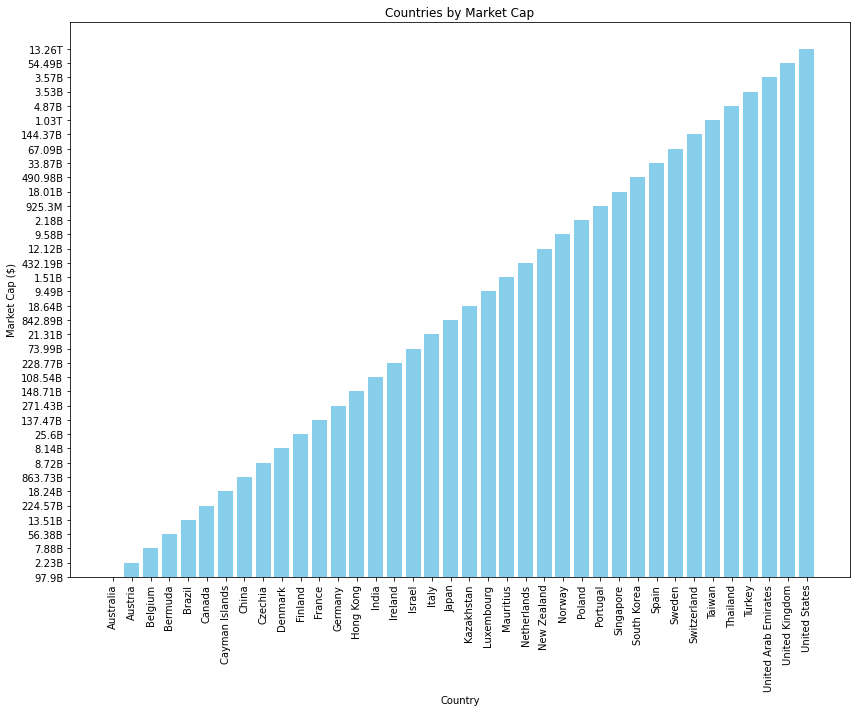

In [22]:
countryMarketCap = data.groupby('Country')['Market Cap'].sum()

countryWiseMarketCap = countryMarketCap.apply(numerize.numerize)

plt.figure(figsize=(12,10))
plt.bar(countryWiseMarketCap.index, countryWiseMarketCap.values, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Market Cap ($)')
plt.title('Countries by Market Cap')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [21]:
print(countryWiseMarketCap)


Country
Australia                 97.9B
Austria                   2.23B
Belgium                   7.88B
Bermuda                  56.38B
Brazil                   13.51B
Canada                  224.57B
Cayman Islands           18.24B
China                   863.73B
Czechia                   8.72B
Denmark                   8.14B
Finland                   25.6B
France                  137.47B
Germany                 271.43B
Hong Kong               148.71B
India                   108.54B
Ireland                 228.77B
Israel                   73.99B
Italy                    21.31B
Japan                   842.89B
Kazakhstan               18.64B
Luxembourg                9.49B
Mauritius                 1.51B
Netherlands             432.19B
New Zealand              12.12B
Norway                    9.58B
Poland                    2.18B
Portugal                 925.3M
Singapore                18.01B
South Korea             490.98B
Spain                    33.87B
Sweden                   67.09B
